<a href="https://colab.research.google.com/github/arshnoor23/Assdignment_3/blob/main/do_assignment_3_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import torch
from torch.autograd import Variable

In [104]:
# Defining global variables that will be used
global x1,x2,p1,p2,p_given
x1 = np.linspace(0.0,1,11)
x2 = 1-x1
x1 = torch.tensor(x1,requires_grad=False)
x2 = torch.tensor(x2,requires_grad=False)
# Saturation Pressure Equations Given
p1 = 10**(8.07131 - 1730.630/(20+233.426))
p2 = 10**(7.43155 - 1554.679/(20+240.337))
# Given Data
p_given = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7,17.5])
p_given = torch.tensor(p_given,requires_grad=False)

In [105]:
# Initializing A
A = Variable(torch.tensor([1.0,1.0]),requires_grad=True)

In [106]:
# Given Function for estimating pressure
p = lambda A: x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p1 + x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p2
# Least Square Error
def objective_function(p,p_given):
  return ((p-p_given)**2).sum()

In [107]:
# Gradient Descent Algorithm
iter = 0
max = 1000
err = 1000
alpha = 0.00001
tol = 1e-06
grad_norm=1
while err >= tol:
  P = p(A)
  err = objective_function(P,p_given)
  err.backward()
  with torch.no_grad():
    A -= alpha * A.grad
    A.grad.zero_() 
  iter += 1   
  if iter>=max:
    break
  

In [108]:
print("The optimal values of A12 and A21 using gradient descent:",A)

The optimal values of A12 and A21 using gradient descent: tensor([1.9103, 1.7298], requires_grad=True)


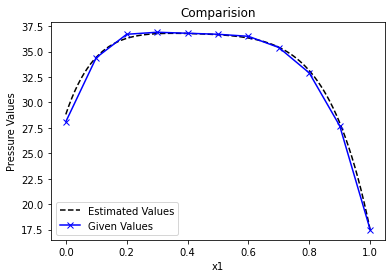

In [109]:
# Comparison between estimated and measured values
import matplotlib.pyplot as plt
x1 = np.linspace(0,1,100)
x2 = 1-x1
x1 = torch.tensor(x1,requires_grad=False)
x2 = torch.tensor(x2,requires_grad=False)
p_estimates = p(A)

x1_given = np.linspace(0,1,11)
x2_given = 1-x1
plt.plot(x1,p_estimates.detach().numpy(),'k--')
plt.plot(x1_given,p_given,'bx-')
plt.legend(['Estimated Values','Given Values'])
plt.title("Comparision")
plt.xlabel('x1')
plt.ylabel('Pressure Values')
plt.show()
